In [5]:
import statistics

In [6]:
from statistics import *

In [8]:
mean([1,2,34,65,87,20])

34.833333333333336

In [9]:
mode([1,2,34,65,87,20,65])

65

In [5]:
median([1,2,34,6,7,98])

6.5

In [6]:
pstdev([1.5,2.5,6.6,2.75,4.75])

1.8255410156991816

In [7]:
stdev([1.5,2.5,6.6,2.75,4.75])

2.0410169034086905

In [8]:
import numpy as np 
import pandas as pd

In [9]:
np.random.seed(42)

In [10]:
normal_male_kg  = np.random.normal(loc = 82, scale = 8,size =6000)
normal_female_kg = np.random.normal(loc= 70,scale =6,size = 6500)

In [12]:
all_weights = np.concatenate((normal_male_kg,normal_female_kg),axis = 0)

In [13]:
df_ppl_mass = pd.DataFrame(data = {'weight_kg':all_weights})

In [14]:
df_ppl_mass.head()

,weight_kg
0,85.973713
1,80.893886
2,87.181508
3,94.184239
4,80.126773


In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

c:\users\aadhi\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,"Distribution of People weights in kg's")

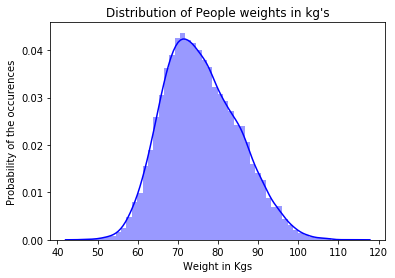

In [19]:
sns.distplot(df_ppl_mass,color = "Blue")
plt.xlabel("Weight in Kgs")
plt.ylabel("Probability of the occurences")
plt.title("Distribution of People weights in kg's")

In [61]:
pop_mean_kg = df_ppl_mass['weight_kg'].mean()
pop_mean_kg

75.73144272789857

In [22]:
pop_std_dev_kg = df_ppl_mass['weight_kg'].std()
pop_std_dev_kg

9.238611739081827

In [24]:
## Taking Random Samples from the population 
sample_means = []
n = 25 
for sample in range(0,300):
    #Random choice with replacement
    sample_values = np.random.choice(a = df_ppl_mass['weight_kg'],size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

c:\users\aadhi\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency of occurence')

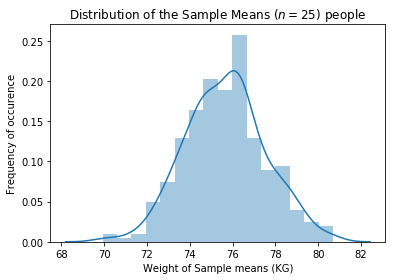

In [26]:
sns.distplot(sample_means)
plt.title("Distribution of the Sample Means $(n=25)$ people")
plt.xlabel("Weight of Sample means (KG)")
plt.ylabel("Frequency of occurence")

In [29]:
median_of_sample = np.median(sample_means)
median_of_sample

75.73945025236802

In [30]:
mean_of_sample = np.mean(sample_means)
mean_of_sample

75.65985505856551

In [31]:
print("The population mean is",pop_mean_kg)
print("The sample mean is:",mean_of_sample)

The population mean is 75.73144272789857
The sample mean is: 75.65985505856551


In [33]:
std_dev_of_sample = np.std(sample_means)
std_dev_of_sample

1.8610802860421913

In [37]:
standard_error = pop_std_dev_kg/np.sqrt(n)
standard_error

1.8477223478163656

In [38]:
gym_sample_mean = 79

c:\users\aadhi\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


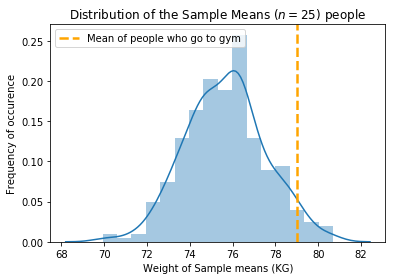

In [44]:
sns.distplot(sample_means)
plt.title("Distribution of the Sample Means $(n=25)$ people")
plt.xlabel("Weight of Sample means (KG)")
plt.ylabel("Frequency of occurence")
plt.axvline(x =gym_sample_mean,linestyle = '--',linewidth = 2.5,label = 'Mean of people who go to gym',c = 'orange')
plt.legend()

In [47]:
z_score = (gym_sample_mean - mean_of_sample)/standard_error
z_score

1.807709337597104

In [49]:
import scipy.stats as stats
prop_less_than_gym_mean = round(stats.norm.cdf(z_score),3)
prop_less_than_gym_mean

0.965

Text(0,0.5,'Frequency of occurence')

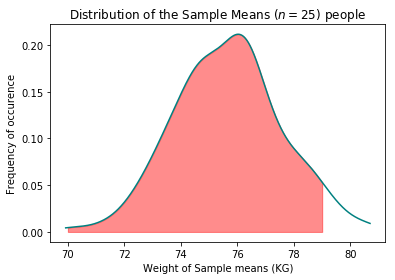

In [60]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),1000)
plt.plot(pos,kde(pos),color = "Teal")
shade = np.linspace(70,gym_sample_mean,300)
plt.fill_between(shade,kde(shade),alpha = 0.45,color = 'Red')

plt.title("Distribution of the Sample Means $(n=25)$ people")
plt.xlabel("Weight of Sample means (KG)")
plt.ylabel("Frequency of occurence")